In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [3]:
train.head()


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


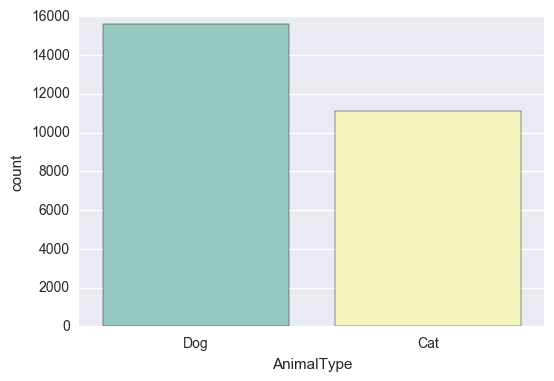

In [4]:
sns.countplot(train.AnimalType, palette='Set3')

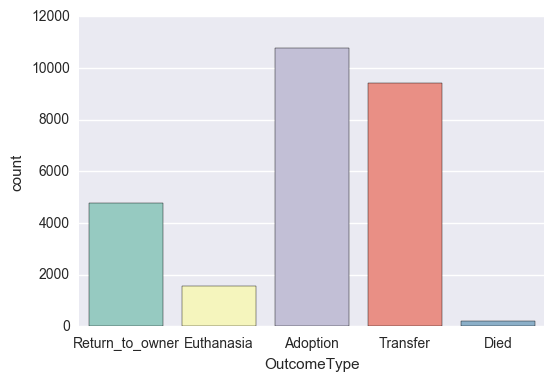

In [5]:
sns.countplot(train.OutcomeType, palette='Set3')

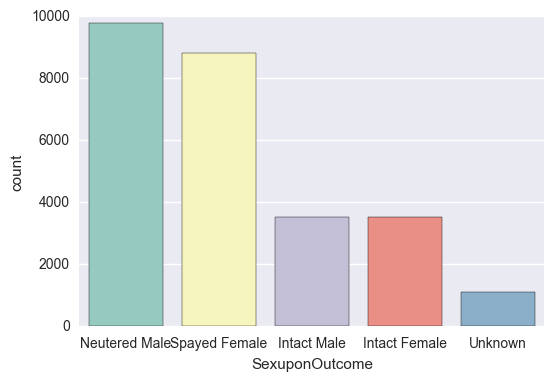

In [6]:
sns.countplot(train.SexuponOutcome, palette='Set3')

In [7]:
# functions to get new parameters from the column
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'
def get_neutered(x):
    x = str(x)
    if x.find('Spayed') >= 0: return 'neutered'
    if x.find('Neutered') >= 0: return 'neutered'
    if x.find('Intact') >= 0: return 'intact'
    return 'unknown'

In [8]:
train['Sex'] = train['SexuponOutcome'].apply(get_sex)
train['Neutered'] = train['SexuponOutcome'].apply(get_neutered)

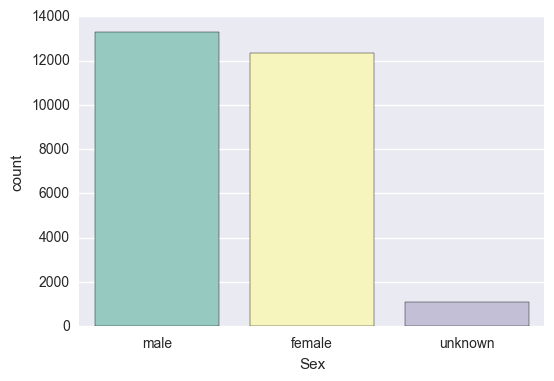

In [9]:
sns.countplot(train.Sex,palette='Set3')

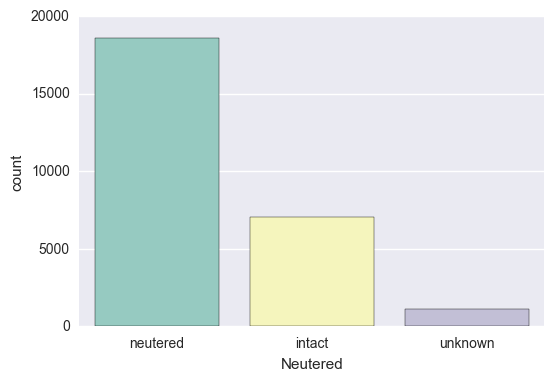

In [10]:
sns.countplot(train.Neutered,palette='Set3')

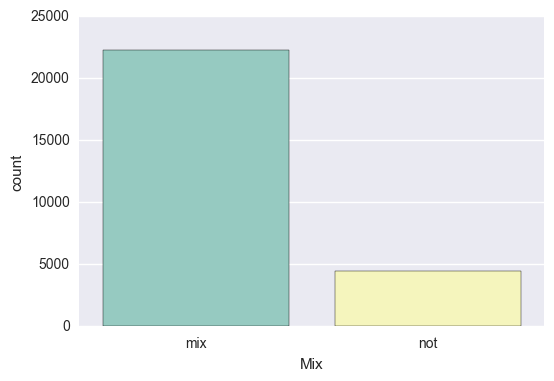

In [11]:
def get_mix(x):
    x = str(x)
    if x.find('Mix') >= 0: return 'mix'
    return 'not'
train['Mix'] = train.Breed.apply(get_mix)
sns.countplot(train.Mix, palette='Set3')

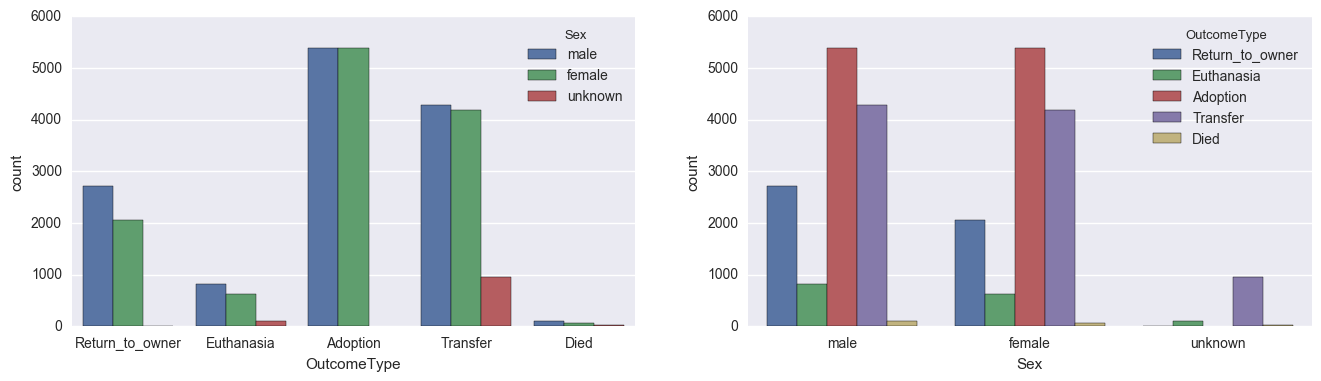

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='Sex', ax=ax1)
sns.countplot(data=train, x='Sex',hue='OutcomeType', ax=ax2)

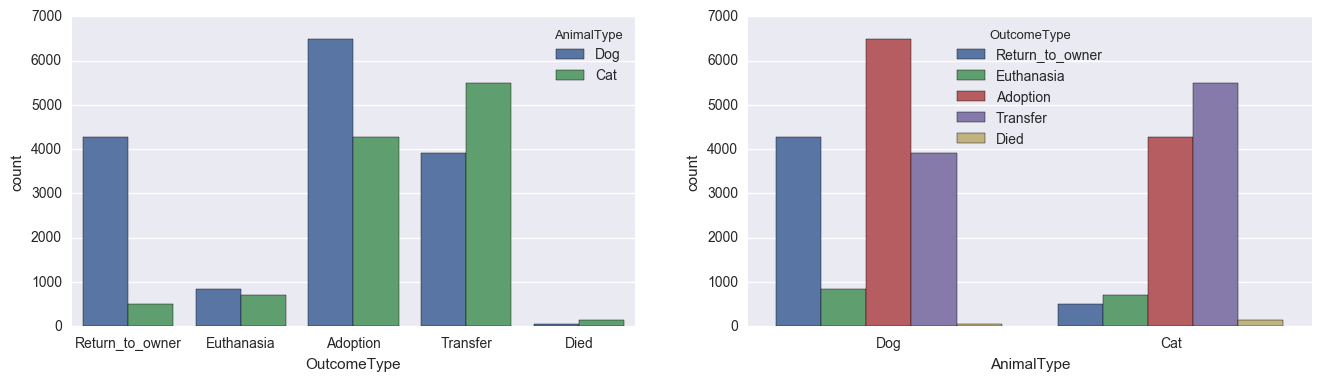

In [13]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
sns.countplot(data=train, x='OutcomeType',hue='AnimalType',ax=ax1)
sns.countplot(data=train, x='AnimalType',hue='OutcomeType',ax=ax2)

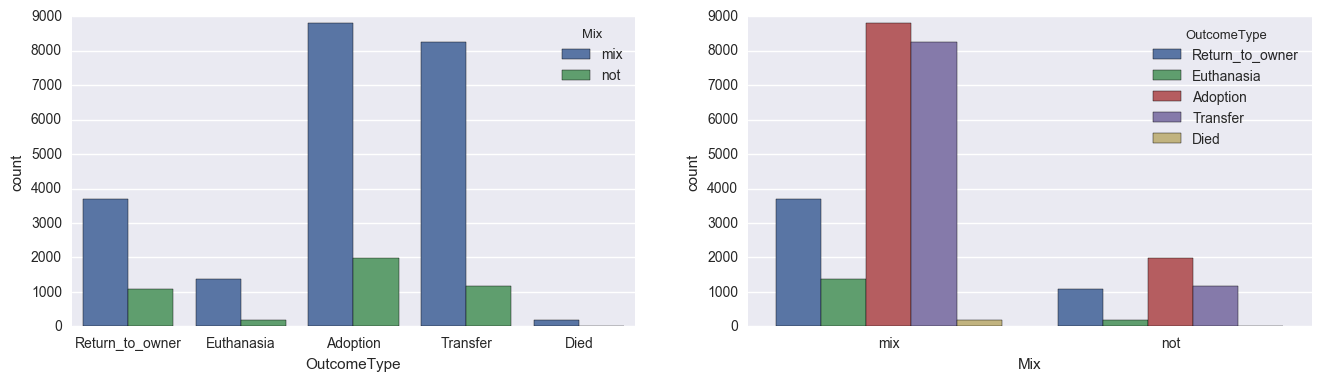

In [14]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
sns.countplot(data=train, x='OutcomeType',hue='Mix',ax=ax1)
sns.countplot(data=train, x='Mix',hue='OutcomeType',ax=ax2)

In [15]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0

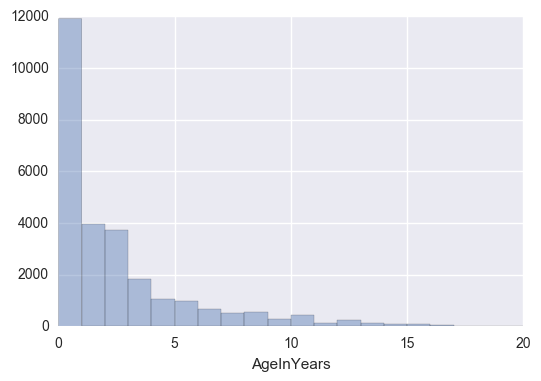

In [16]:
train['AgeInYears'] = train.AgeuponOutcome.apply(calc_age_in_years)

sns.distplot(train.AgeInYears, bins = 20, kde=False)


In [17]:
def calc_age_category(x):
    if x < 3: return 'young'
    if x < 5: return 'young adult'
    if x < 10: return 'adult'
    return 'old'
train['AgeCategory'] = train.AgeInYears.apply(calc_age_category)


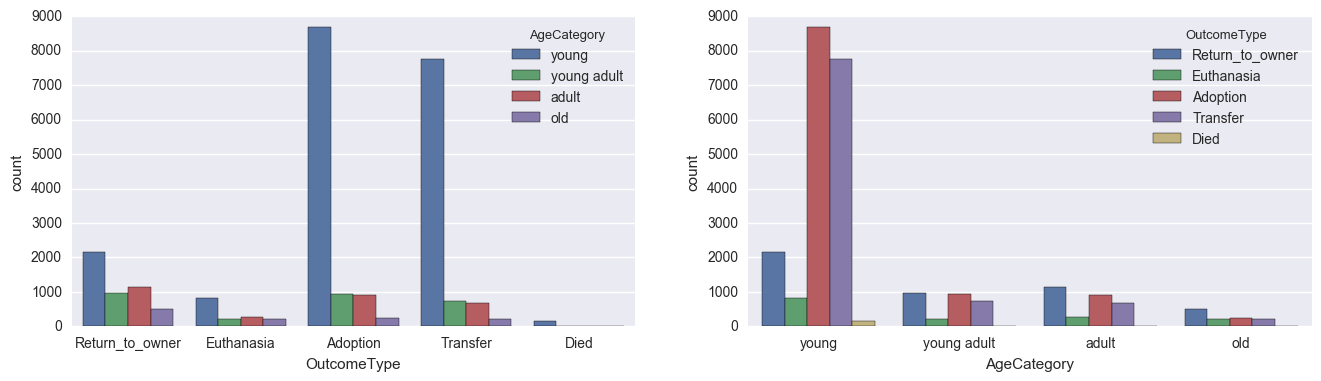

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train,x='OutcomeType',hue='AgeCategory',ax=ax1)
sns.countplot(data=train,x='AgeCategory',hue='OutcomeType',ax=ax2)

Now let's explore more on the breed details

In [19]:
def removeMix(x):
    x = x.replace("Mix","")
    return x
train['Breed'] = train['Breed'].apply(removeMix)


In [20]:
typeCount = train['Breed'].value_counts()
typeCount.update(test['Breed'].value_counts())
def isRare(x):
    if x not in typeCount:
        return "NotFound"
    if typeCount[x]<150:
        return "Rare"
    else:
        return x
train['Breed'] = train['Breed'].apply(isRare)


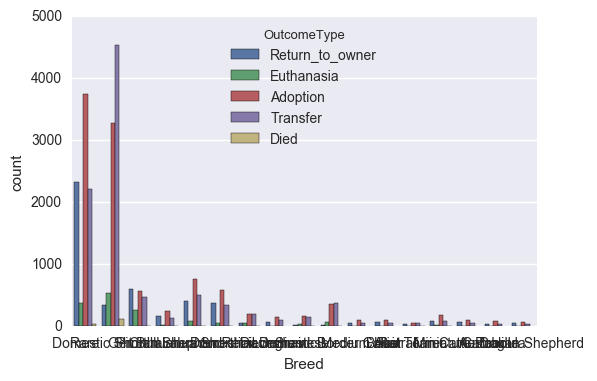

In [21]:
sns.countplot(data=train,hue='OutcomeType',x='Breed')

In [22]:
train['Breed'].value_counts()

Domestic Shorthair        8810
Rare                      8692
Pit Bull                  1906
Chihuahua Shorthair       1766
Labrador Retriever        1363
Domestic Medium Hair       839
German Shepherd            575
Domestic Longhair          520
Siamese                    389
Australian Cattle Dog      367
Dachshund                  318
Boxer                      245
Miniature Poodle           233
Border Collie              229
Australian Shepherd        163
Catahoula                  157
Rat Terrier                157
Name: Breed, dtype: int64

In [23]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,Mix,AgeInYears,AgeCategory
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Rare,Brown/White,male,neutered,mix,1.000000,young
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair,Cream Tabby,female,neutered,mix,1.000000,young
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull,Blue/White,male,neutered,mix,2.000000,young
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair,Blue Cream,male,intact,mix,0.057692,young
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Rare,Tan,male,neutered,not,2.000000,young


In [24]:
selectCol = ['AnimalType','Sex','Neutered','Mix','AgeInYears','AgeCategory','Breed']
target = train['OutcomeType']
train = train[selectCol]
train.head()

,AnimalType,Sex,Neutered,Mix,AgeInYears,AgeCategory,Breed
0,Dog,male,neutered,mix,1.000000,young,Rare
1,Cat,female,neutered,mix,1.000000,young,Domestic Shorthair
2,Dog,male,neutered,mix,2.000000,young,Pit Bull
3,Cat,male,intact,mix,0.057692,young,Domestic Shorthair
4,Dog,male,neutered,not,2.000000,young,Rare


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['AnimalType'] = encoder.fit_transform(train['AnimalType'])
train['Sex'] = encoder.fit_transform(train['Sex'])
train['Neutered'] = encoder.fit_transform(train['Neutered'])
train['Mix'] = encoder.fit_transform(train['Mix'])
train['AgeCategory'] = encoder.fit_transform(train['AgeCategory'])

In [26]:
#train = pd.concat([train,breeds_dummies],axis=1)
train.head()

,AnimalType,Sex,Neutered,Mix,AgeInYears,AgeCategory,Breed
0,1,1,1,0,1.000000,2,Rare
1,0,0,1,0,1.000000,2,Domestic Shorthair
2,1,1,1,0,2.000000,2,Pit Bull
3,0,1,0,0,0.057692,2,Domestic Shorthair
4,1,1,1,1,2.000000,2,Rare


In [27]:
train = train.drop('Breed',1)

In [28]:
train.head()

,AnimalType,Sex,Neutered,Mix,AgeInYears,AgeCategory
0,1,1,1,0,1.000000,2
1,0,0,1,0,1.000000,2
2,1,1,1,0,2.000000,2
3,0,1,0,0,0.057692,2
4,1,1,1,1,2.000000,2


In [30]:
X_train = train.drop('AnimalType',1)


In [31]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [32]:
test['AgeInYears'] = test.AgeuponOutcome.apply(calc_age_in_years)
test['AgeCategory'] = test.AgeInYears.apply(calc_age_category)
test['Sex'] = test['SexuponOutcome'].apply(get_sex)
test['Neutered'] = test['SexuponOutcome'].apply(get_neutered)
test['Mix'] = test.Breed.apply(get_mix)
selectTestCol = ['Sex','Neutered','Mix','AgeInYears','AgeCategory']
X_test = test[selectTestCol]
X_test['Sex'] = encoder.fit_transform(X_test['Sex'])
X_test['Neutered'] = encoder.fit_transform(X_test['Neutered'])
X_test['Mix'] = encoder.fit_transform(X_test['Mix'])
X_test['AgeCategory'] = encoder.fit_transform(X_test['AgeCategory'])
X_test.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

,Sex,Neutered,Mix,AgeInYears,AgeCategory
0,0,0,0,0.833333,2
1,0,1,1,2.000000,2
2,1,1,0,1.000000,2
3,1,0,0,0.333333,2
4,1,1,0,2.000000,2


In [41]:
y_prob = classifier.predict_proba(X_test)


In [42]:
ID = test['ID']

columns = ['ID','Adoption','Died','Euthanasia','Return_to_owner','Transfer']
predict_df = pd.DataFrame(
    {'ID': ID,
     'Adoption': y_prob[:,0],
     'Died': y_prob[:,1],
     'Euthanasia': y_prob[:,2],
     'Return_to_owner': y_prob[:,3],
     'Transfer': y_prob[:,4]
     },  columns=columns)
predict_df.to_csv('animals_outcome_prediction_v2.csv',index=False)